In [88]:
import requests
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Extracting Data from the API

In [122]:
COUNTRY_DATA = {
        "USA": "United States",
        "ESP": "Spain",
        "HUN": "Hungary",
        "MAR": "Morocco",
        "CHL": "Chile",
        "HRV": "Croatia",
        "JPN": "Japan",
        "FIN": "Finland",
        "DEU": "Germany",
        "NZL": "New Zealand",
        "JOR": "Jordan",
        "ZAF" : "South Africa"
        # Add more countries as needed
    }

ADV_COUNTRIES  = [
        "USA",
        "ESP",
        "JPN",
        "FIN",
        "DEU",
        "NZL",
    ]

EMER_COUNTRIES = [
    "MAR",
    "CHL",
    "JOR",
    "ZAF",
    "HUN",
    "HRV",
]

INDICATORS = {
    "Population": "LP",
    "current account balance": "BCA_NGDPD",
    "General government net lending/borrowing": "GGXCNL_NGDP",
    "General government gross debt": "GGXWDG_NGDP",
    "Unemployment rate": "LUR",
    "GDP per Capita": "NGDPDPC",
    "Government revenue (% of GDP)": "rev",
    "Government expenditure (% of GDP)": "exp",
    "Gross public debt": "d",
    "Real GDP growth rate": "rgc",
    "Household Debt": "HH_ALL",
}
TIME_SPAN = list(range(2018, 2023+1)) 

BASE_URL = "https://www.imf.org/external/datamapper/api/v1/"

In [123]:
def parseData(rawData):
    countries = []
    years = []
    values = []
    for country in data.keys():
        country_data = data[country]
        countries += [country]*len(country_data)
        years += country_data.keys()
        values += country_data.values()
        
    dfSource = {
        "Country": countries,
        "Year": years,
        indicator_id: values,
    }
    return pd.DataFrame(dfSource)

In [124]:
def mergeDFs(main_df, new_df):
    if main_df is None:
        return new_df
    else:
        return pd.merge(main_df, new_df, on=["Country","Year"], how="outer")

In [125]:
country_codes = "/".join(COUNTRY_DATA.keys())
periods = ",".join((str(y) for y in TIME_SPAN))

# Create Final and Clean Dataframe

In [126]:
main_df = None
for indicator_name, indicator_id in INDICATORS.items():
    #for year in [2018]: #TIME_SPAN:
    #url = f"{base_url}/{indicator_id}/{country_code}?periods={year}"
    url = f"{BASE_URL}/{indicator_id}/{country_codes}?periods={periods}"
    print(url)
    #try:
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()["values"][indicator_id]
        indicator_df = parseData(data)
        main_df = mergeDFs(main_df, indicator_df)
    else:
        print(response.status_code)
       

https://www.imf.org/external/datamapper/api/v1//LP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//BCA_NGDPD/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//GGXCNL_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//GGXWDG_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//LUR/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//NGDPDPC/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//rev/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://w

In [127]:
#main data indicators data frame 
main_df
#advanced countries data frame
advanced_df = main_df.loc[main_df["Country"].isin(ADV_COUNTRIES)]
advanced_df.reset_index(drop = True, inplace = True)
#emerging countries data frame
emerging_df = main_df.loc[main_df["Country"].isin(EMER_COUNTRIES)]
emerging_df.reset_index(drop = True, inplace = True)
advanced_df

,Country,Year,LP,BCA_NGDPD,GGXCNL_NGDP,GGXWDG_NGDP,LUR,NGDPDPC,rev,exp,d,rgc,HH_ALL
0,DEU,2018,82.906,8.0,1.9,61.9,3.2,47961.181,46.270900,44.320997,61.316347,0.983762,52.664577
1,DEU,2019,83.093,8.2,1.5,59.5,3.0,46810.283,46.528809,45.002547,58.925563,1.070506,53.503049
2,DEU,2020,83.161,7.1,-4.3,68.7,3.6,46711.984,46.122489,50.461788,67.986011,-3.829225,57.055937
3,DEU,2021,83.196,7.7,-3.6,69.0,3.6,51460.987,47.349984,50.936516,68.622975,3.168678,56.755744
4,DEU,2022,83.798,4.2,-2.5,66.1,3.1,48756.309,46.977618,49.477354,66.535292,1.804266,55.238489
5,DEU,2023,83.861,6.0,-2.9,65.9,3.3,52823.575,NaN,NaN,NaN,NaN,NaN
6,ESP,2018,46.729,1.9,-2.6,100.4,15.3,30438.338,39.218879,41.812538,100.415481,2.283134,62.889009
7,ESP,2019,47.105,2.1,-3.1,98.2,14.1,29603.298,39.223677,42.283942,98.221004,1.983288,60.804263
8,ESP,2020,47.356,0.6,-10.1,120.3,15.5,26968.374,41.784434,51.900430,120.265734,-11.165054,67.136975
9,ESP,2021,47.331,0.8,-6.8,116.8,14.8,30563.552,43.190896,49.977010,116.767508,6.399863,63.082574


# A. National Debt Changes, 2018-2023

In [129]:
# Define the dataframe with the required indicator 'd'
selected_adv_df = pd.DataFrame()
selected_emer_df = pd.DataFrame()
selected_adv_df = advanced_df.iloc[:,[0, 1, 10]]
selected_emer_df = emerging_df.iloc[:,[0, 1, 10]] #select which indicator via the column number starting at 0 for Country
selected_emer_df

,Country,Year,d
0,CHL,2018,25.798028
1,CHL,2019,28.297729
2,CHL,2020,32.352589
3,CHL,2021,36.303300
4,CHL,2022,37.975480
5,CHL,2023,NaN
6,HRV,2018,74.452168
7,HRV,2019,71.945971
8,HRV,2020,86.778855
9,HRV,2021,78.585761


# Line Plot Advanced Countries

/var/folders/t4/w3vljbzj433_gszvl1s1gb7w0000gn/T/ipykernel_32444/1842492348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_adv_df['d'].fillna(0, inplace=True) #due to no reporting for 2023 there will be a major drop in this data to "0"


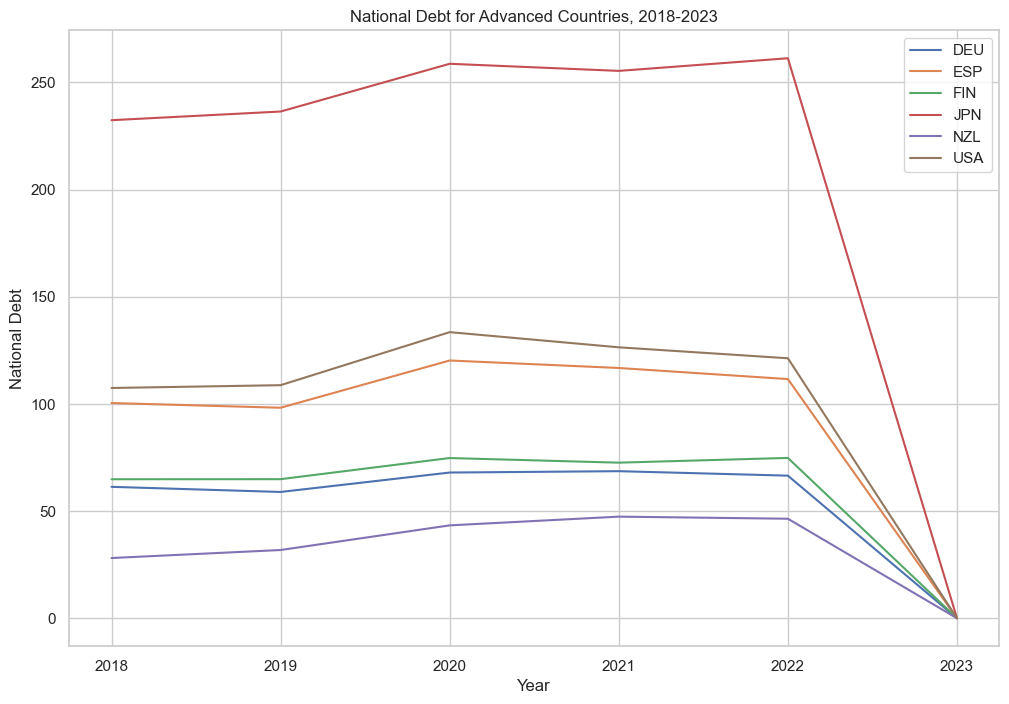

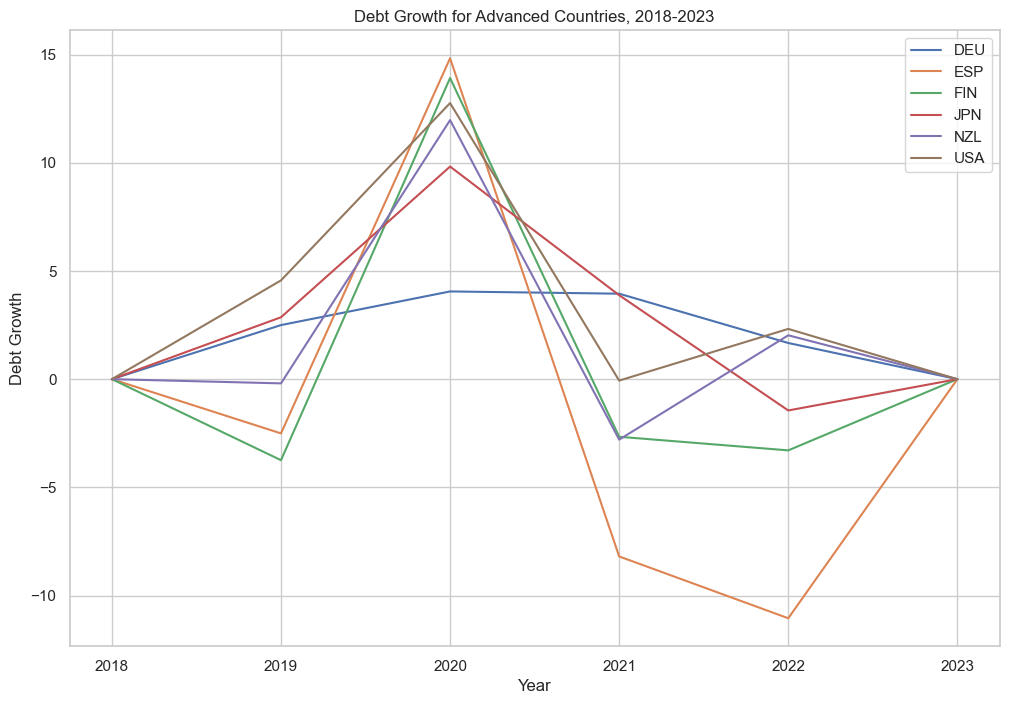

In [130]:
# Replace 'NaN' values with 0 for plotting
selected_adv_df['d'].fillna(0, inplace=True) #due to no reporting for 2023 there will be a major drop in this data to "0"

# Plotting the national debt for each country over the years
plt.figure(figsize=(12, 8))

for country in selected_adv_df['Country'].unique():
    country_data = selected_adv_df[selected_adv_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['d'], label=country)

plt.title('National Debt for Advanced Countries, 2018-2023')
plt.xlabel('Year')
plt.ylabel('National Debt')
plt.legend()
plt.grid(True)

plt.savefig('lineplot_adv_debt.png')

plt.show()

# Analyzing trends of debt growth 
debt_growth = selected_emer_df.groupby('Country')['d'].diff().fillna(0)

plt.figure(figsize=(12, 8))
for country in selected_adv_df['Country'].unique():
    country_data = selected_adv_df[selected_adv_df['Country'] == country]
    plt.plot(country_data['Year'], debt_growth[country_data.index], label=country)

plt.title('Debt Growth for Advanced Countries, 2018-2023')
plt.xlabel('Year')
plt.ylabel('Debt Growth')
plt.legend()
plt.grid(True)

plt.savefig('lineplot_adv_debtgrowth.png')

plt.show()

# Line Plot for Emerging Countries

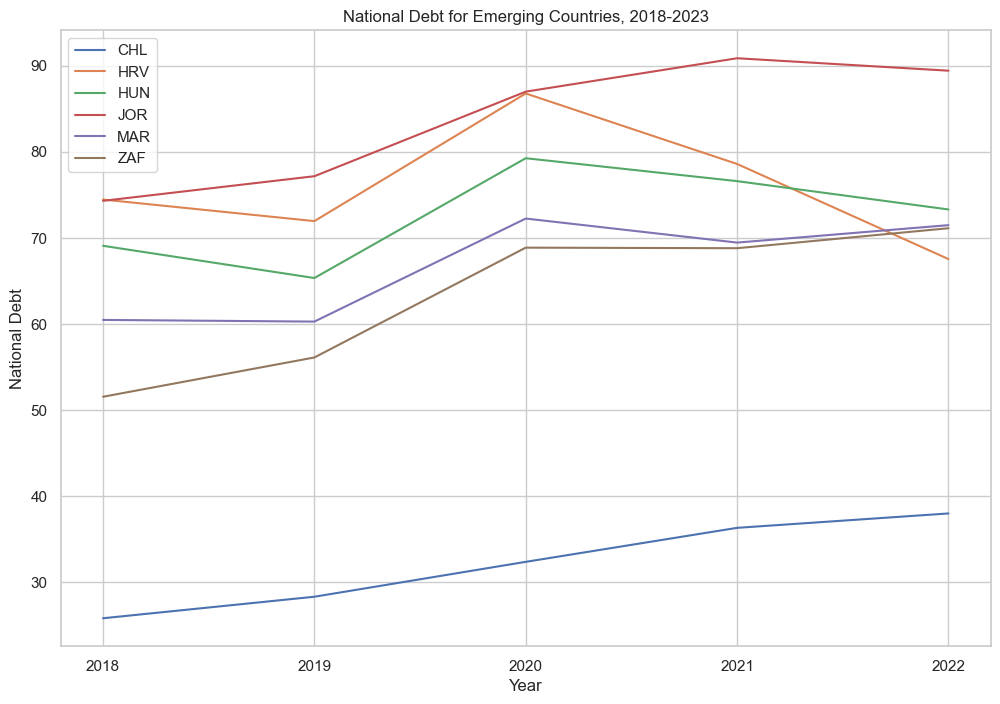

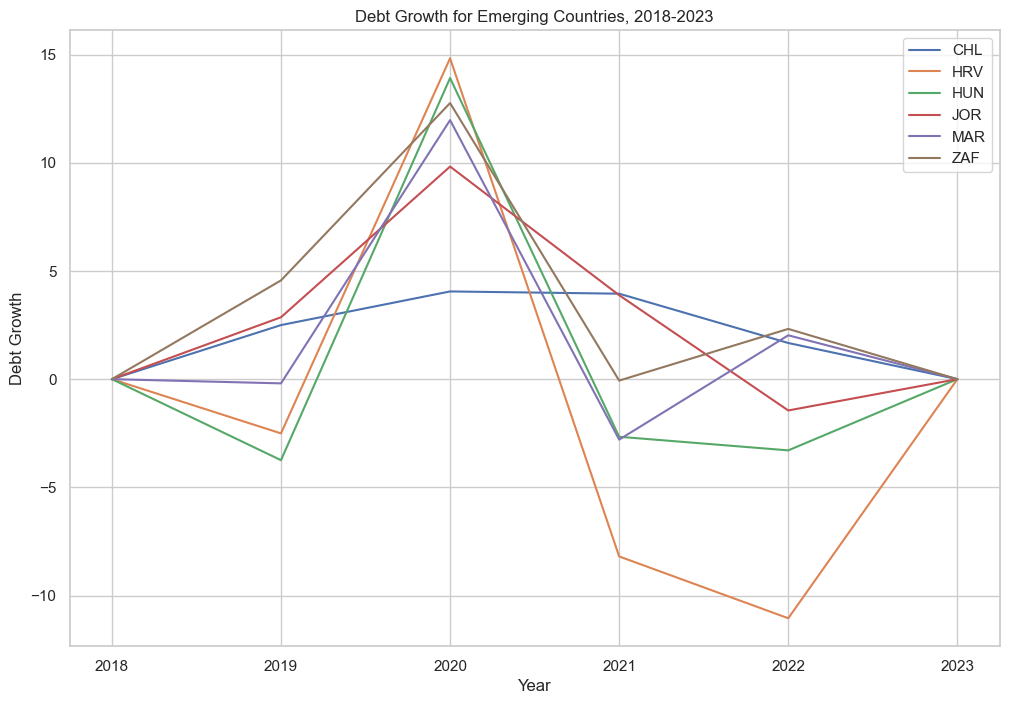

In [131]:
# Plotting the national debt for each country over the years
plt.figure(figsize=(12, 8))

for country in selected_emer_df['Country'].unique():
    country_data = selected_emer_df[selected_emer_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['d'], label=country)

plt.title('National Debt for Emerging Countries, 2018-2023')
plt.xlabel('Year')
plt.ylabel('National Debt')
plt.legend()
plt.grid(True)

plt.savefig('lineplot_emer_debt.png')

plt.show()

# Analyzing trends of debt growth
debt_growth = selected_emer_df.groupby('Country')['d'].diff().fillna(0)

plt.figure(figsize=(12, 8))
for country in selected_emer_df['Country'].unique():
    country_data = selected_emer_df[selected_emer_df['Country'] == country]
    plt.plot(country_data['Year'], debt_growth[country_data.index], label=country)

plt.title('Debt Growth for Emerging Countries, 2018-2023')
plt.xlabel('Year')
plt.ylabel('Debt Growth')
plt.legend()
plt.grid(True)

plt.savefig('lineplot_emer_debtgrowth.png')

plt.show()

# Statistcal Analysis

In [132]:
# Descriptive statistics
debt_advanced_stats = selected_adv_df.groupby('Country')['d'].describe()

print(debt_advanced_stats)

# Descriptive statistics

debt_emer_stats = selected_emer_df.groupby('Country')['d'].describe()
print(debt_emer_stats)

         count        mean         std  min         25%         50%  \
Country                                                               
DEU        6.0   53.897698   26.684455  0.0   59.523259   63.925819   
ESP        6.0   91.210925   45.532764  0.0   98.769623  106.005654   
FIN        6.0   58.651714   29.093677  0.0   64.870112   68.743911   
JPN        6.0  207.368070  102.295507  0.0  233.397376  245.912367   
NZL        6.0   32.852963   17.940091  0.0   29.032646   37.588602   
USA        6.0   99.567082   49.808508  0.0  107.764782  115.026511   

                75%         max  
Country                          
DEU       67.623331   68.622975  
ESP      115.474587  120.265734  
FIN       74.213328   74.807149  
JPN      257.879966  261.288810  
NZL       45.659884   47.409599  
USA      125.138919  133.495543  
         count       mean       std        min        25%        50%  \
Country                                                                
CHL        5.0 

# Heatmap for Advanced Countries

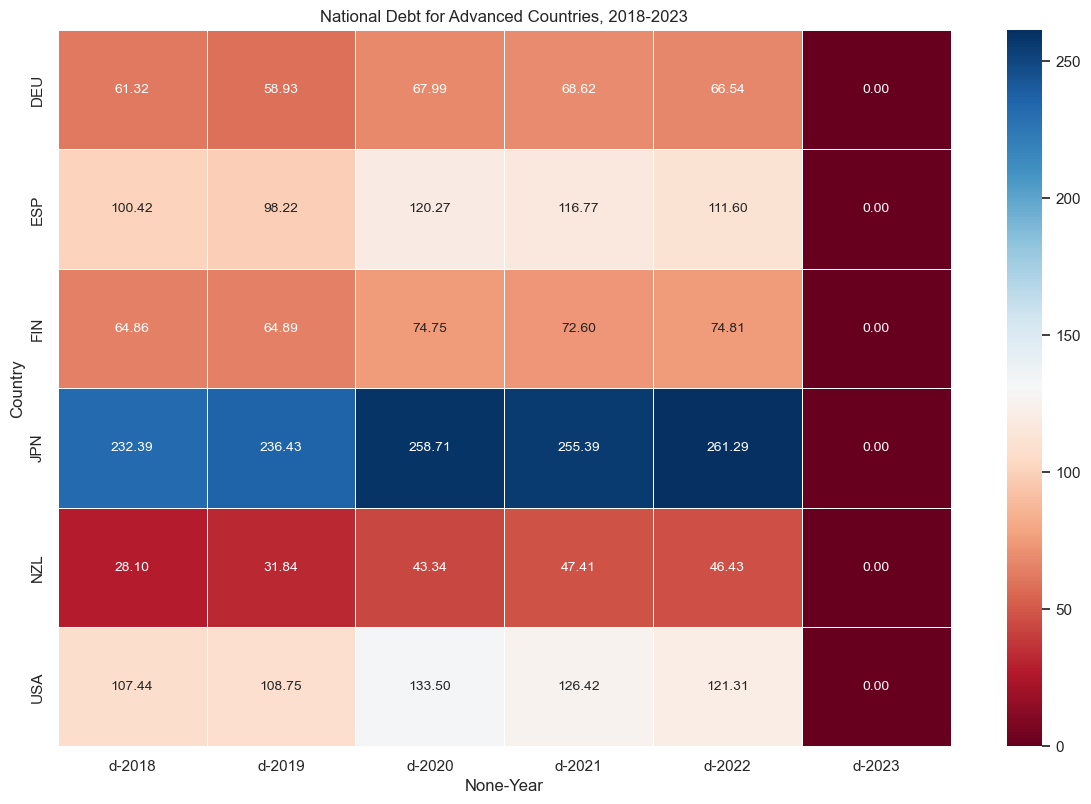

In [133]:
# using pivot for the dataframe, country should be set as index for better comparison for all 3 variables.
heatmap_data = selected_adv_df.pivot_table(index='Country', columns='Year', values=['d'], aggfunc='mean')

# create the heatmap plot
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Fixing cells to display numbers better
plt.tight_layout()

# set up the title
plt.title('National Debt for Advanced Countries, 2018-2023')

plt.savefig('heatmap_adv_debt.png')

# display the heatmap
plt.show()

# Heatmap for Emerging Countries

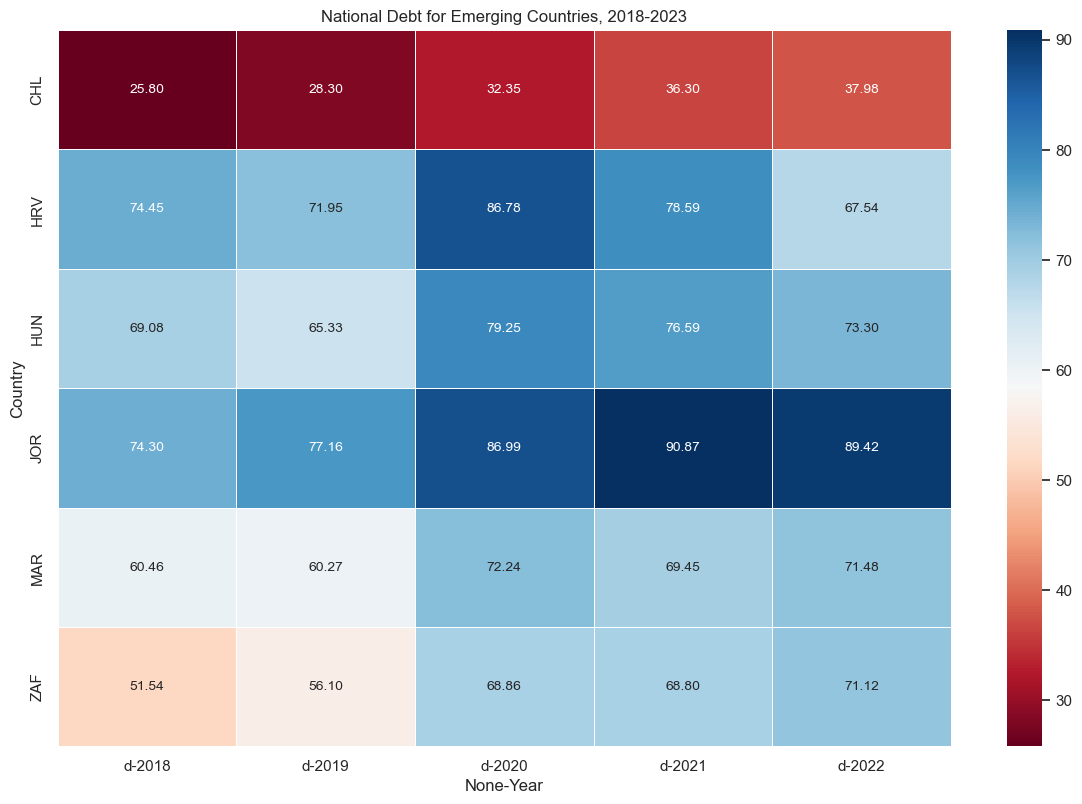

In [134]:
# using pivot for the dataframe, country should be set as index for better comparison for all 3 variables.
heatmap_data = selected_emer_df.pivot_table(index='Country', columns='Year', values=['d'], aggfunc='mean')

# create the heatmap plot
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Fixing cells to display numbers better
plt.tight_layout()

# set up the title
plt.title('National Debt for Emerging Countries, 2018-2023')

plt.savefig('heatmap_emer_debt.png')

# display the heatmap
plt.show()

# B. National Debt Correlations with GDP Growth and Revenue, 2018-2023

In [158]:
#pulling specific columns from both data frames
selected_adv_df = pd.DataFrame()
selected_emer_df = pd.DataFrame()
selected_adv_df = advanced_df.iloc[:,[0, 1, 7, 8, 11]]
selected_emer_df = emerging_df.iloc[:,[0, 1, 7, 8, 11]] #select which indicator via the column number starting at 0 for Country
selected_emer_df

,Country,Year,NGDPDPC,rev,rgc
0,CHL,2018,15755.003,24.133440,3.990029
1,CHL,2019,14567.988,23.739982,0.743130
2,CHL,2020,13067.742,21.974626,-6.145247
3,CHL,2021,16092.149,25.986625,11.737431
4,CHL,2022,15166.472,28.133618,2.440403
5,CHL,2023,17253.752,NaN,NaN
6,HRV,2018,15009.085,45.442694,2.799159
7,HRV,2019,15089.373,46.520096,3.420060
8,HRV,2020,14231.063,46.805016,-8.530496
9,HRV,2021,17770.900,46.183126,13.086290


# Line Plot Emerging Countries - Revenue Graphs 

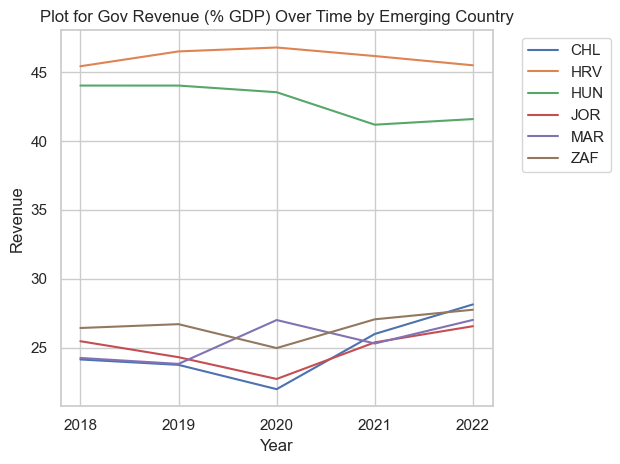

In [160]:
#plot1 = plt.subplot2grid((3,3),(2,2))
#plot2 = plt.subplot2grid((3,3),(1,1))

selected_emer_df = emerging_df.iloc[:,[0, 1, 7, 8, 11]]

for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.plot(selected_emer_df['Year'], selected_emer_df['rev'], label=country)

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Plot for Gov Revenue (% GDP) Over Time by Emerging Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.savefig("Revenue(%GDP)_EmergingCountries")

plt.tight_layout()
plt.show()


# Line Plot Advanced Countries - Revenue Graphs 

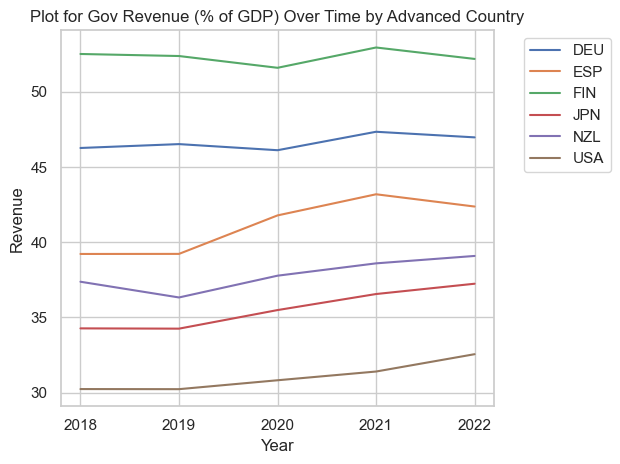

In [161]:
selected_adv_df = advanced_df.iloc[:,[0, 1, 7, 8, 11]]

for country, selected_adv_df in selected_adv_df.groupby('Country'):
    plt.plot(selected_adv_df['Year'], selected_adv_df['rev'], label=country)
    
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Plot for Gov Revenue (% of GDP) Over Time by Advanced Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Revenue(%GDP)_AdvancedCountries")

plt.tight_layout()
plt.show()

# GDP/Capita - Emerging Countries


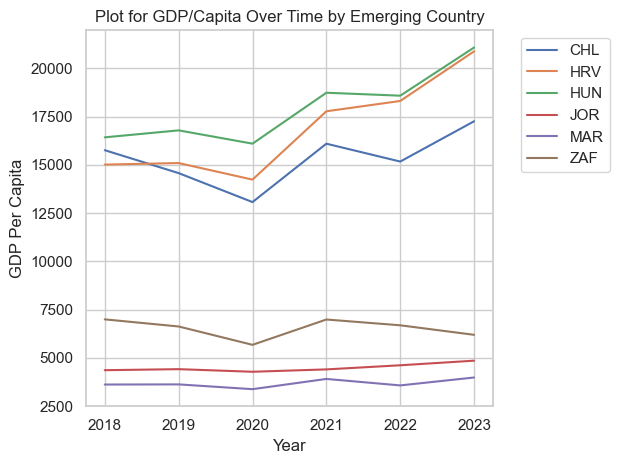

In [162]:
selected_emer_df = emerging_df.iloc[:,[0, 1, 7, 8, 11]] #select which indicator via the column number starting at 0 for Country

for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.plot(selected_emer_df['Year'], selected_emer_df['NGDPDPC'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Plot for GDP/Capita Over Time by Emerging Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("GDPperCapita_EmergingCountries")

plt.tight_layout()
plt.show()

# GDP/Capita - Advanced Countries


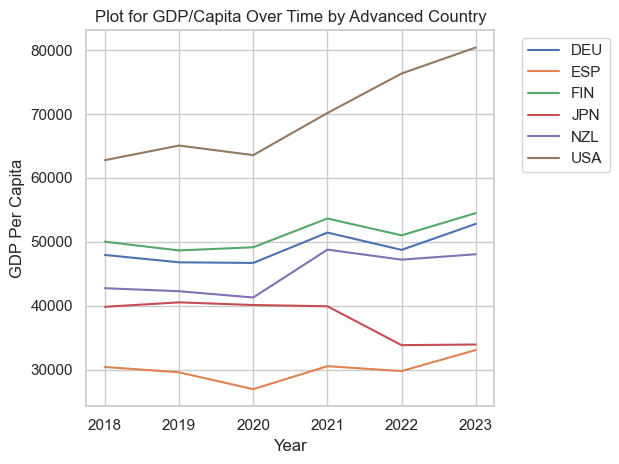

In [163]:
selected_adv_df = advanced_df.iloc[:,[0, 1, 7, 8, 11]] #select which indicator via the column number starting at 0 for Country

for country, selected_adv_df in selected_adv_df.groupby('Country'):
    plt.plot(selected_adv_df['Year'], selected_adv_df['NGDPDPC'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Plot for GDP/Capita Over Time by Advanced Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("GDPperCapita_AdvancedCountries")

plt.tight_layout()
plt.show()

In [164]:
#Why the sudden jump in Morocco's government revenue (% of GDP)?
selected_adv_df = advanced_df.iloc[:,[0, 1, 7, 8, 11]] #select which indicator via the column number starting at 0 for Country


#Let's examine the population changes in the emerging countries
for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.plot(selected_emer_df['Year'], selected_emer_df['LP'], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Plot for Population Over Time by Emerging Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Population_EmergingCountries")

plt.tight_layout()
plt.show()

KeyError: 'LP'

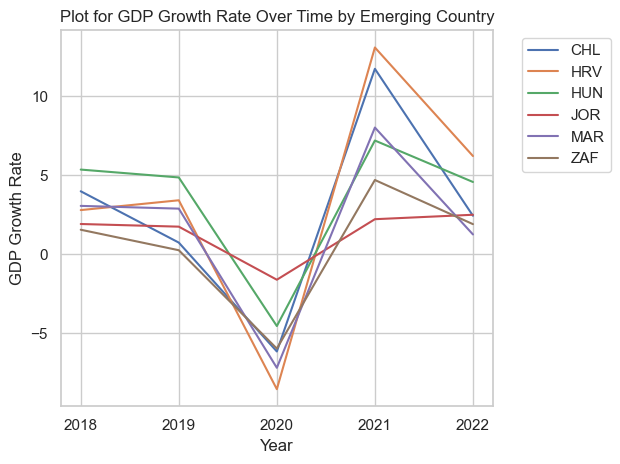

In [167]:
selected_emer_df = emerging_df.iloc[:,[0, 1, 7, 8, 11]] #select which indicator via the column number starting at 0 for Country

#Let's examine the GDP growth of Morocco
for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.plot(selected_emer_df['Year'], selected_emer_df['rgc'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')
plt.title('Plot for GDP Growth Rate Over Time by Emerging Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("GDPGrowthRate_EmergingCountries")

plt.tight_layout()
plt.show()

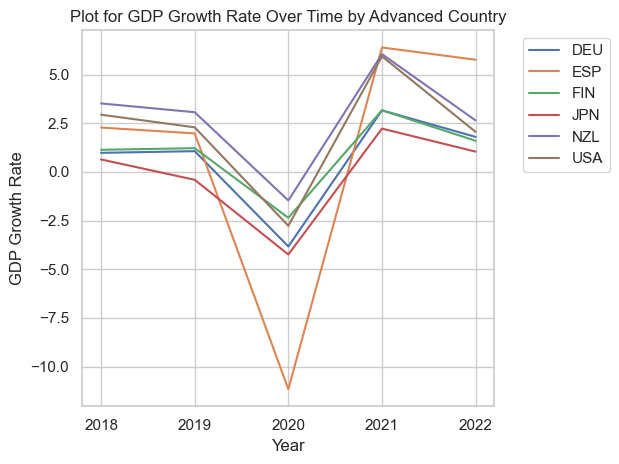

In [166]:
selected_adv_df = advanced_df.iloc[:,[0, 1, 7, 8, 11]] #select which indicator via the column number starting at 0 for Country

for country, selected_adv_df in selected_adv_df.groupby('Country'):
    plt.plot(selected_adv_df['Year'], selected_adv_df['rgc'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')
plt.title('Plot for GDP Growth Rate Over Time by Advanced Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("GDPGrowthRate_AdvancedCountries")

plt.tight_layout()
plt.show()

# C. National Debt Correlation with Population Growth and Unemployment Rate, 2018-2023

In [148]:
#pulling specific columns
selected_adv_df = pd.DataFrame()
selected_emer_df = pd.DataFrame()
selected_adv_df = advanced_df.iloc[:,[0, 1, 2, 6, 10]]
selected_emer_df = emerging_df.iloc[:,[0, 1, 2, 6, 10]] #select which indicator via the column number starting at 0 for Country
selected_emer_df

,Country,Year,LP,LUR,d
0,CHL,2018,18.751,7.4,25.798028
1,CHL,2019,19.107,7.2,28.297729
2,CHL,2020,19.458,10.8,32.352589
3,CHL,2021,19.678,8.9,36.303300
4,CHL,2022,19.829,7.9,37.975480
5,CHL,2023,19.961,8.8,NaN
6,HRV,2018,4.088,9.9,74.452168
7,HRV,2019,4.065,7.8,71.945971
8,HRV,2020,4.048,9.0,86.778855
9,HRV,2021,3.879,8.1,78.585761


# Advanced Countries Barplot


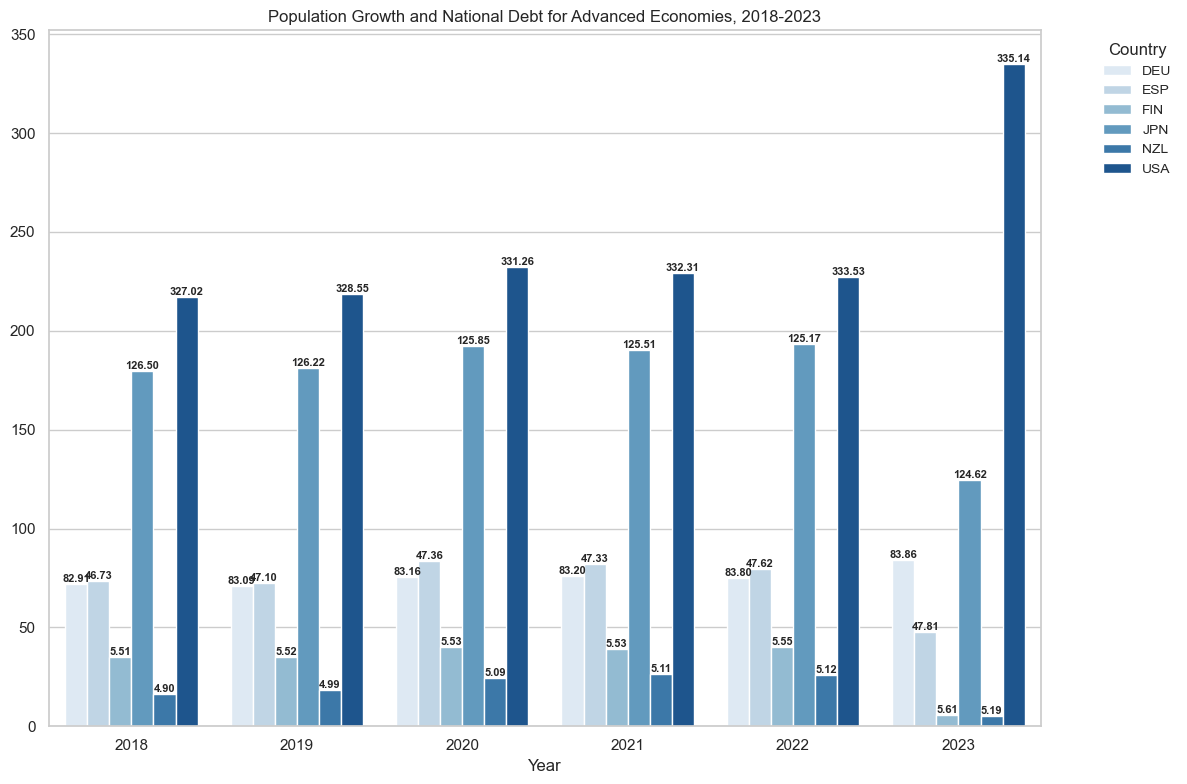

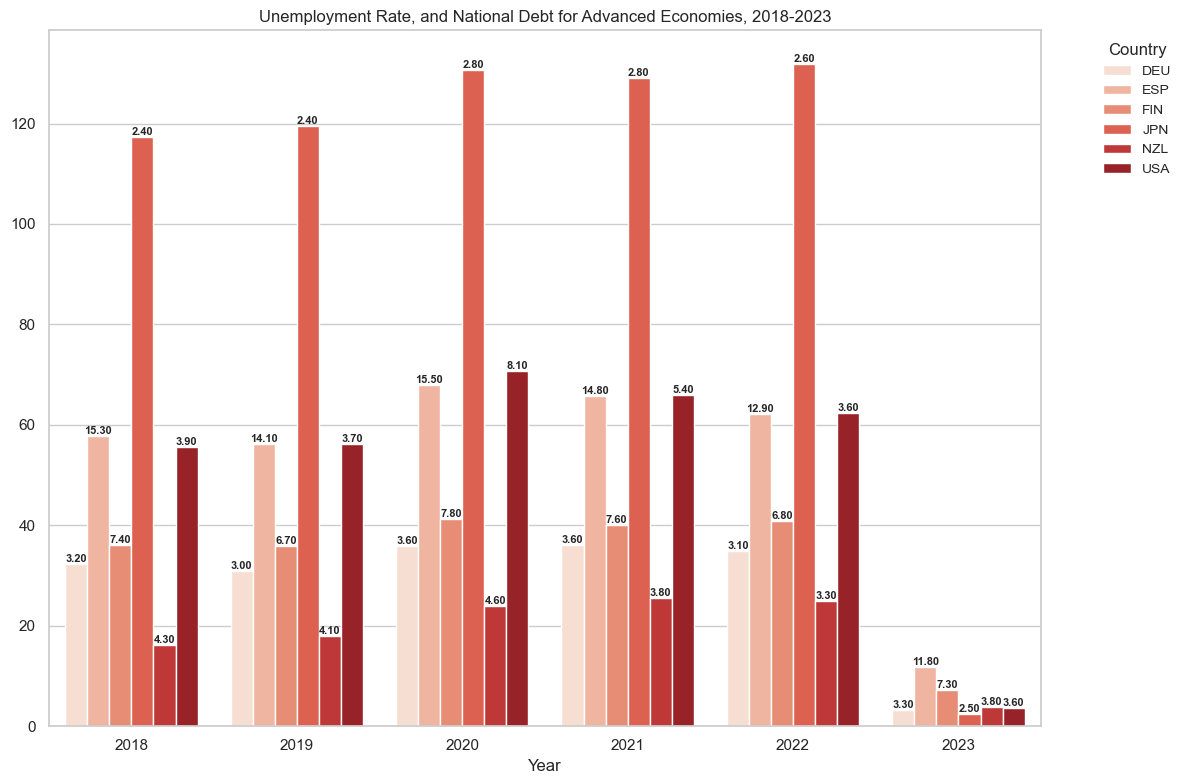

In [149]:
# set seaborn style
sns.set(style="whitegrid")

# choose the preferred palette for the index Country
lp_palette = sns.color_palette("Blues", len(selected_adv_df['Country'].unique()))
lur_palette = sns.color_palette("Reds", len(selected_adv_df['Country'].unique()))

# Melt the DataFrame to reshape it for barplot
melted_df_lp = pd.melt(selected_adv_df, id_vars=['Year', 'Country'], 
                       value_vars=['LP', 'd'], var_name='Variable', value_name='Value')
melted_df_lur = pd.melt(selected_adv_df, id_vars=['Year', 'Country'], 
                        value_vars=['LUR', 'd'], var_name='Variable', value_name='Value')

# create LP figure, D variable is mentioned in numeric value
plt.figure(figsize=(12, 8))
lp_plot = sns.barplot(x='Year', y='Value', hue='Country', data=melted_df_lp, palette=lp_palette, errorbar=None)
for bar, value in zip(lp_plot.patches, melted_df_lp['Value']):
    lp_plot.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title('Population Growth and National Debt for Advanced Economies, 2018-2023')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', 
           title_fontsize='12', fontsize='10', frameon=False)

# adjust the size of the figure to show all numbers
plt.tight_layout()

# save the plot
plt.savefig('bar_plots_advLP.png')

# create LUR figure, D variable is mentioned in numeric value
plt.figure(figsize=(12, 8))
lur_plot = sns.barplot(x='Year', y='Value', hue='Country', data=melted_df_lur, palette=lur_palette, errorbar=None)
for bar, value in zip(lur_plot.patches, melted_df_lur['Value']):
    lur_plot.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8, fontweight='bold')

# set up the value for the x, y and title
plt.title('Unemployment Rate, and National Debt for Advanced Economies, 2018-2023')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='12', fontsize='10', frameon=False)
plt.tight_layout()


# save the figure
plt.savefig('bar_plots_adv.png')

# display the barplot
plt.show()

# Emerging Countries Barplot


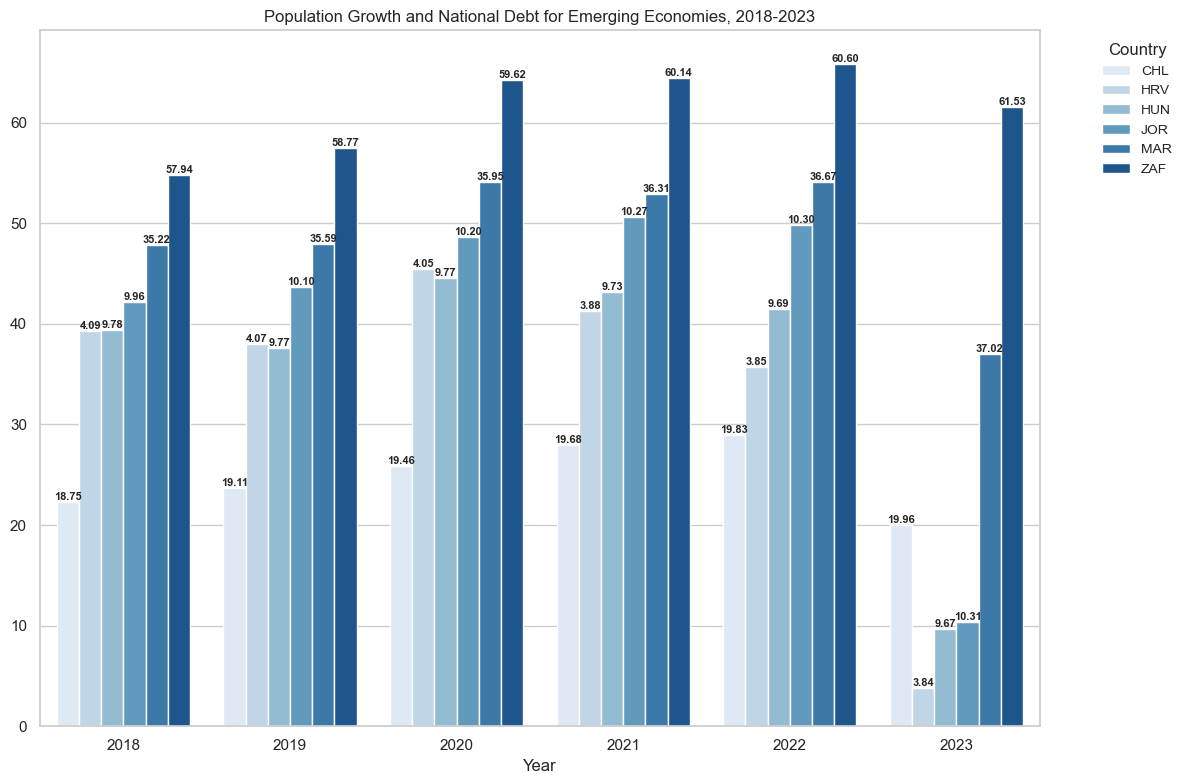

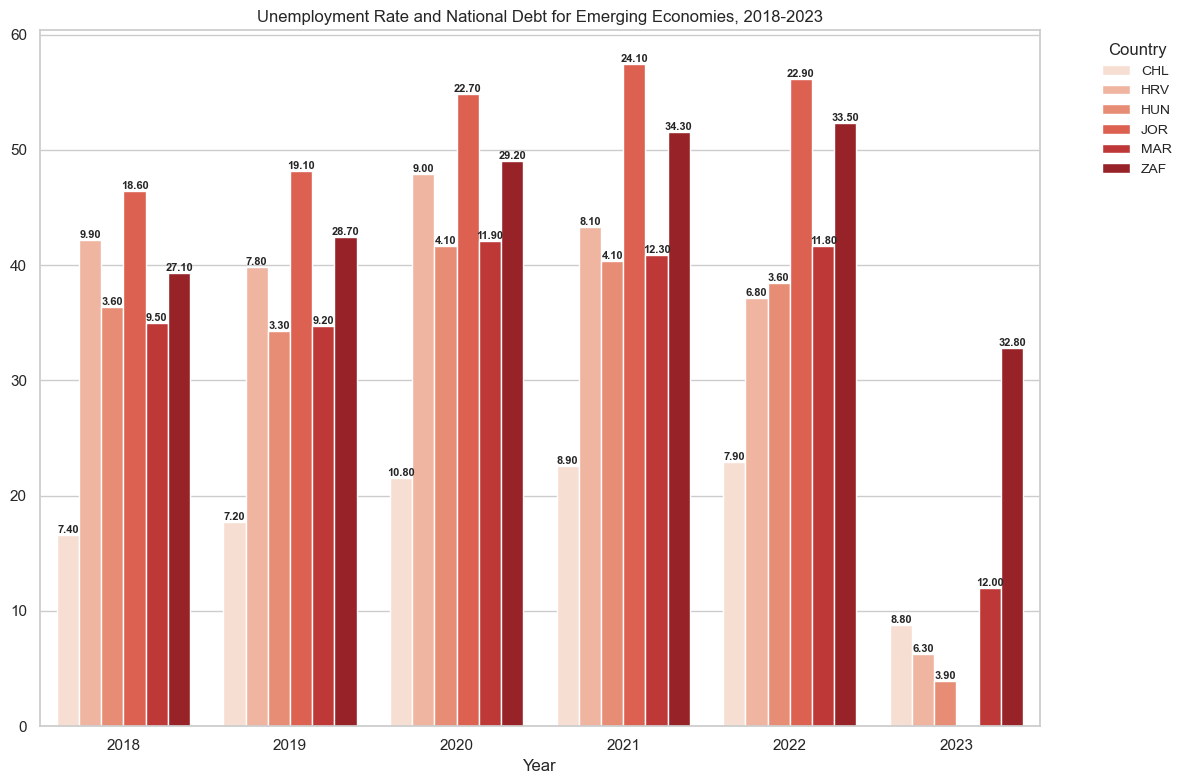

In [150]:
# set seaborn style
sns.set(style="whitegrid")

# choose the preferred palette for the index Country
lp_palette = sns.color_palette("Blues", len(selected_emer_df['Country'].unique()))
lur_palette = sns.color_palette("Reds", len(selected_emer_df['Country'].unique()))

# Melt the DataFrame to reshape it for barplot
melted_df_lp = pd.melt(selected_emer_df, id_vars=['Year', 'Country'], value_vars=['LP', 'd'], var_name='Variable', value_name='Value')
melted_df_lur = pd.melt(selected_emer_df, id_vars=['Year', 'Country'], value_vars=['LUR', 'd'], var_name='Variable', value_name='Value')

# create LP figure, D variable is mentioned in numeric value
plt.figure(figsize=(12, 8))
lp_plot = sns.barplot(x='Year', y='Value', hue='Country', data=melted_df_lp, palette=lp_palette, errorbar=None)
for bar, value in zip(lp_plot.patches, melted_df_lp['Value']):
    lp_plot.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title('Population Growth and National Debt for Emerging Economies, 2018-2023')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='12', fontsize='10', frameon=False)
plt.tight_layout()

# save the plot
plt.savefig('bar_plots_emerLP.png')

# create LUR figure, D variable is mentioned in numeric value
plt.figure(figsize=(12, 8))
lur_plot = sns.barplot(x='Year', y='Value', hue='Country', data=melted_df_lur, palette=lur_palette, errorbar=None)
for bar, value in zip(lur_plot.patches, melted_df_lur['Value']):
    lur_plot.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8, fontweight='bold')

# set up the value for the x, y and title
plt.title('Unemployment Rate and National Debt for Emerging Economies, 2018-2023')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='12', fontsize='10', frameon=False)
plt.tight_layout()

# save the plot
plt.savefig('bar_plots_emer.png')

# display the barplot
plt.show()

# Advanced Economies Heatmap

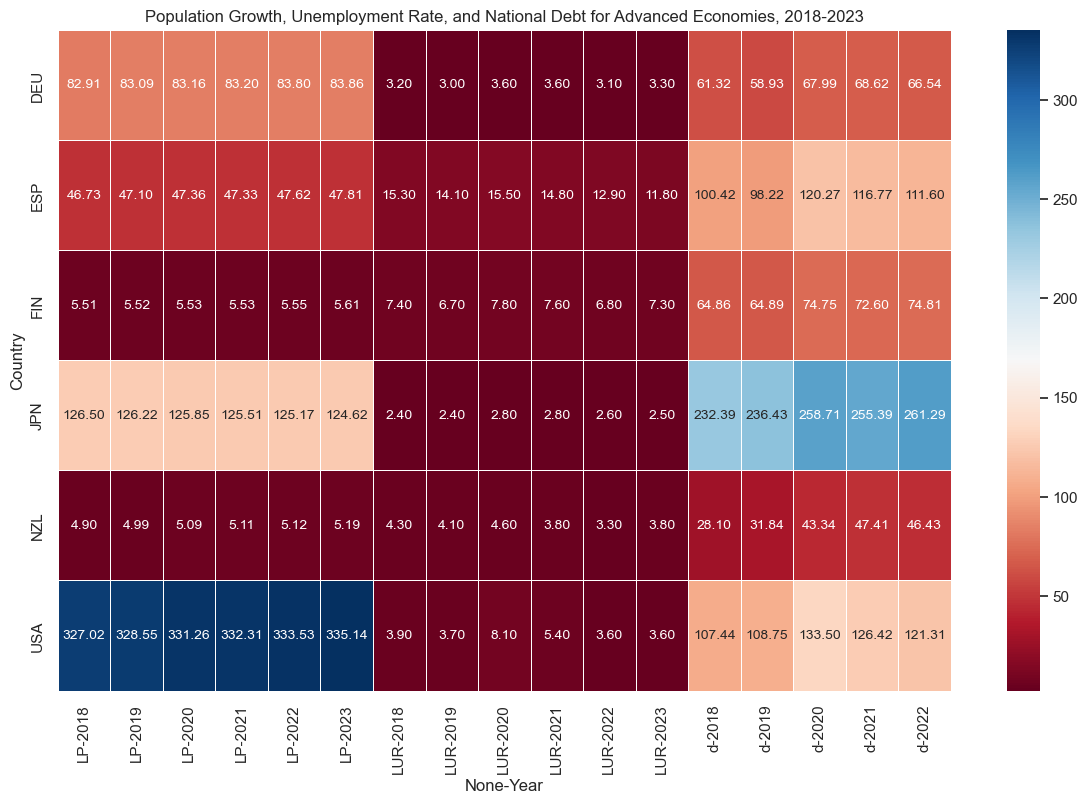

In [151]:
# using pivot for the dataframe, country should be set as index for better comparison for all 3 variables.
heatmap_data = selected_adv_df.pivot_table(index='Country', columns='Year', values=['LP', 'LUR', 'd'], aggfunc='mean')

# create the heatmap plot
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Fixing cells to display numbers better
plt.tight_layout()

# set up the title
plt.title('Population Growth, Unemployment Rate, and National Debt for Advanced Economies, 2018-2023')

# display the heatmap
plt.show()

# Emerging Economies Heatmap

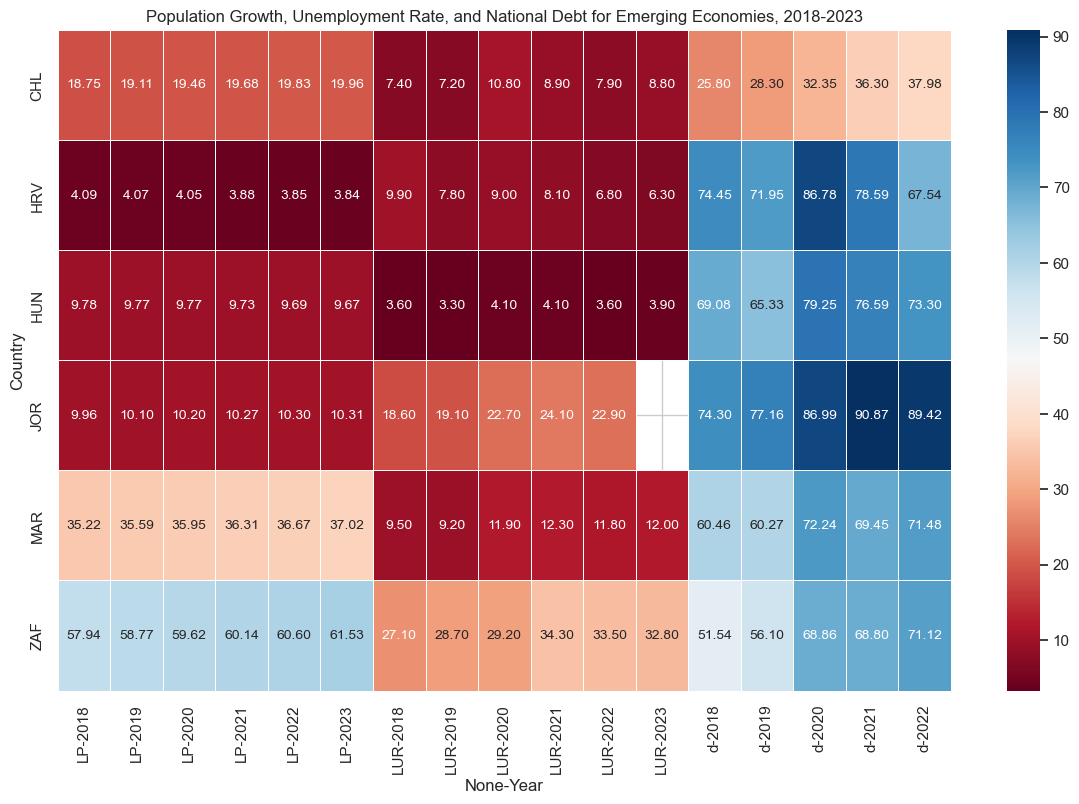

In [152]:
# using pivot for the dataframe, country should be set as index for better comparison for all 3 variables.
heatmap_data_emer = selected_emer_df.pivot_table(index='Country', columns='Year', values=['LP', 'LUR', 'd'], aggfunc='mean')

# create the heatmap plot
plt.figure(figsize=(12, 8))
heatmap_emer = sns.heatmap(heatmap_data_emer, cmap='RdBu', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Fixing cells to display numbers better
plt.tight_layout()

# set up the title
plt.title('Population Growth, Unemployment Rate, and National Debt for Emerging Economies, 2018-2023')

# display the heatmap
plt.show()

# Calculate the Average and Create Pair Plot for 'd', 'LUR' and 'LP'

  Country        LUR           d          LP
0     DEU   3.300000   64.677237   83.335833
1     ESP  14.066667  109.453111   47.324333
2     FIN   7.266667   70.382057    5.541000
3     JPN   2.583333  248.841684  125.644000
4     NZL   3.983333   39.423555    5.066333
5     USA   4.716667  119.480498  331.302333
6     NaN   5.986111  108.709690   99.702306


/Users/owner/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


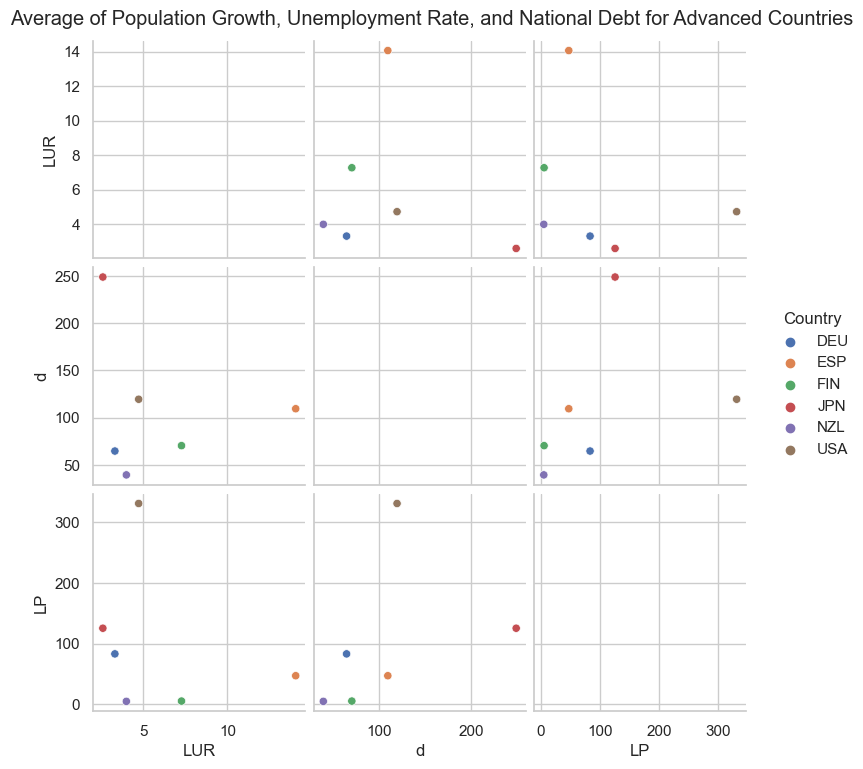

In [153]:
# calcuale avergae as group for 'LUR', 'd', and 'LP' for each country
average_data = selected_adv_df.groupby('Country').agg({
    'LUR': 'mean',
    'd': 'mean',
    'LP': 'mean'
}).reset_index()

# add the average into the rows
average_data = pd.concat([average_data, pd.DataFrame({
    'LUR': [average_data['LUR'].mean()],
    'd': [average_data['d'].mean()],
    'LP': [average_data['LP'].mean()]
})], ignore_index=True)

# display the results
print(average_data)

# create the pairplot for the countries 
figure = sns.pairplot(average_data, hue='Country', markers='o')

figure.fig.suptitle('Average of Population Growth, Unemployment Rate, and National Debt for Advanced Countries', y=1.02)

plt.savefig('pair_plot_adv.png')

# display the plot
plt.show()

  Country        LUR          d         LP
0     CHL   8.500000  32.145425  19.464000
1     HRV   7.983333  75.859615   3.962500
2     HUN   3.766667  72.711124   9.735333
3     JOR  21.480000  83.750366  10.192000
4     MAR  11.116667  66.781517  36.127167
5     ZAF  30.933333  63.283658  59.768500
6     NaN  13.963333  65.755284  23.208250


/Users/owner/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


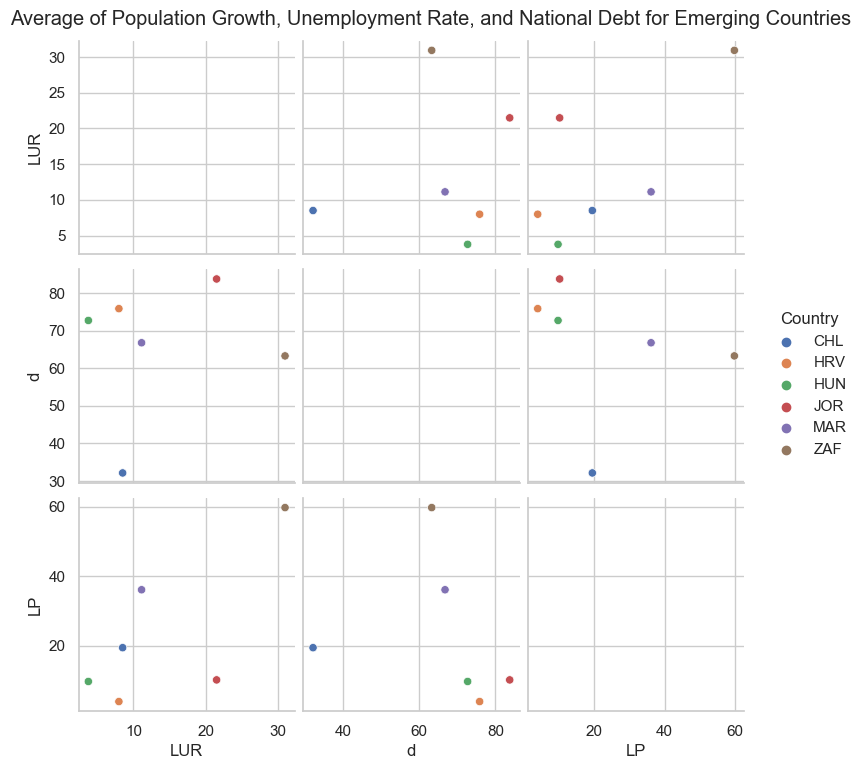

In [154]:
# calcuale avergae as group for 'LUR', 'd', and 'LP' for each country
average_data = selected_emer_df.groupby('Country').agg({
    'LUR': 'mean',
    'd': 'mean',
    'LP': 'mean'
}).reset_index()

# add the average into the rows
average_data = pd.concat([average_data, pd.DataFrame({
    'LUR': [average_data['LUR'].mean()],
    'd': [average_data['d'].mean()],
    'LP': [average_data['LP'].mean()]
})], ignore_index=True)

# display the results
print(average_data)

# create the pairplot for the countries 
figure = sns.pairplot(average_data, hue='Country', markers='o')

figure.fig.suptitle('Average of Population Growth, Unemployment Rate, and National Debt for Emerging Countries', y=1.02)

# save the plot
plt.savefig('pair_plot_emer.png')

# display the plot
plt.show()

